<a href="https://colab.research.google.com/github/dhirajdeore3/dhirajdeore3/blob/main/Goldpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GOLD PRICE PREDICTION  :- DHIRAJ DEORE**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('gld_price_data.csv')

In [ ]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
print(dataset.shape)

(2290, 6)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


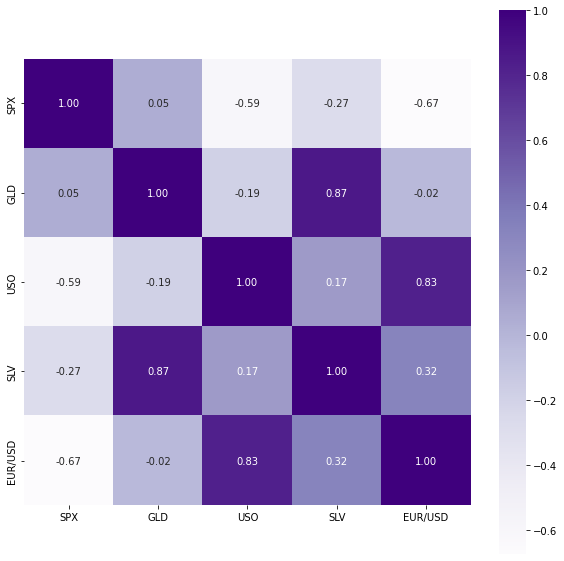

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws = {'size':10}, cmap='Purples')

In [ ]:
x = dataset.drop(['Date', 'GLD'], axis=1)
y = dataset['GLD']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1832, 4) (458, 4)


In [ ]:
def predict(mod1):
    mod = mod1
    mod.fit(x_train, y_train)
    y_pd = mod.predict(x_test)
    print('RSS: ', metrics.r2_score(y_test, y_pd))
    print('MAE :', metrics.mean_absolute_error(y_test, y_pd))
    plt.scatter(y_test, y_pd)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted')
    plt.show()
    plt.scatter(y_test, y_pd, c='crimson')
    p1 = max(max(y_pd), max(y_train))
    p2 = min(min(y_pd), min(y_train))
    plt.plot([p1,p2], [p1,p2], 'b-')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted')
    plt.show()

RSS:  0.8975640982991402
MAE : 5.695900644269285


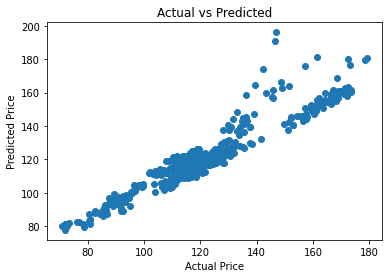

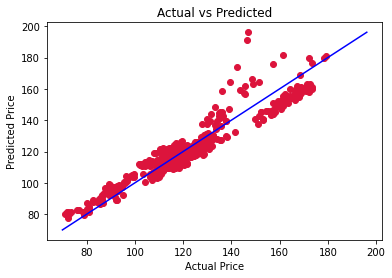

In [ ]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression())

RSS:  0.9891277243950385
MAE : 1.2498175469869004


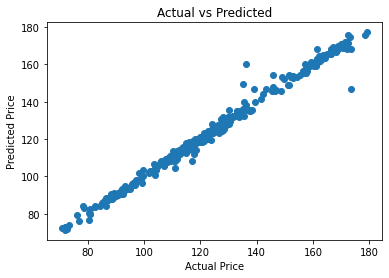

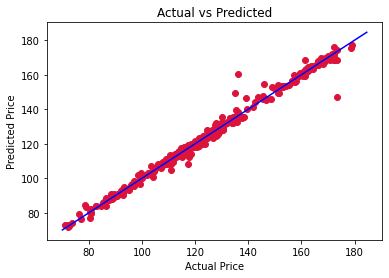

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(n_estimators = 100, random_state = 0))

[09:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RSS:  0.9786727792088113
MAE : 2.282324308185428


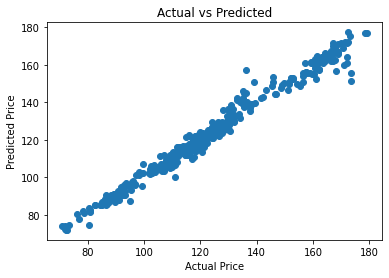

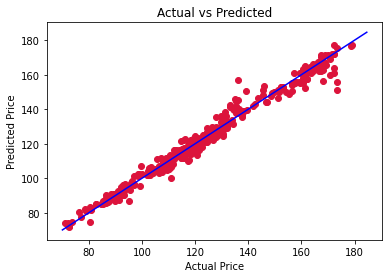

In [ ]:
from xgboost import XGBRegressor
predict(XGBRegressor())

In [ ]:

model = LinearRegression()                                    # using XGB to make predictions for our test case
model.fit(x_train, y_train)

test_case_list = [2254.2540, 99.589, 458.222, 0.25]    #creating a list of random price of independent variables
test_case_df = pd.DataFrame(test_case_list)               # converting the list into a dataframe
test_case = test_case_df.T                                # the shape of current df is (4,1) and the required shape is (1,4)
test_case_prediction = model.predict(test_case)           # predicting the price of GOLD for test case
print('Price of Gold would be:', test_case_prediction)

Price of Gold would be: [1492.59255467]
